# Regression
## Boston Housing Price Prediction

In [163]:
import pandas as pd
import numpy as np
import sklearn

In [164]:
print(pd.__version__)
print(np.__version__)
print(sklearn.__version__)

2.3.3
2.2.5
1.7.1


In [165]:
df=pd.read_csv("HousingData.csv")

In [166]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006,18.000,2.310,0.000,0.538,6.575,65.200,4.090,1,296,15.300,396.900,4.980,24.000
1,0.027,0.000,7.070,0.000,0.469,6.421,78.900,4.967,2,242,17.800,396.900,9.140,21.600
2,0.027,0.000,7.070,0.000,0.469,7.185,61.100,4.967,2,242,17.800,392.830,4.030,34.700
3,0.032,0.000,2.180,0.000,0.458,6.998,45.800,6.062,3,222,18.700,394.630,2.940,33.400
4,0.069,0.000,2.180,0.000,0.458,7.147,54.200,6.062,3,222,18.700,396.900,NaN,36.200


# Exploratory Data Anaysis(EDA):

In [167]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000,486.000,486.000,486.000,506.000,506.000,486.000,506.000,506.000,506.000,506.000,506.000,486.000,506.000
mean,3.612,11.212,11.084,0.070,0.555,6.285,68.519,3.795,9.549,408.237,18.456,356.674,12.715,22.533
std,8.720,23.389,6.836,0.255,0.116,0.703,28.000,2.106,8.707,168.537,2.165,91.295,7.156,9.197
min,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730,5.000
25%,0.082,0.000,5.190,0.000,0.449,5.885,45.175,2.100,4.000,279.000,17.400,375.377,7.125,17.025
50%,0.254,0.000,9.690,0.000,0.538,6.208,76.800,3.207,5.000,330.000,19.050,391.440,11.430,21.200
75%,3.560,12.500,18.100,0.000,0.624,6.623,93.975,5.188,24.000,666.000,20.200,396.225,16.955,25.000
max,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.127,24.000,711.000,22.000,396.900,37.970,50.000


In [168]:
import matplotlib.pyplot as plt
import seaborn as sns
print(sns.__version__)

0.13.2


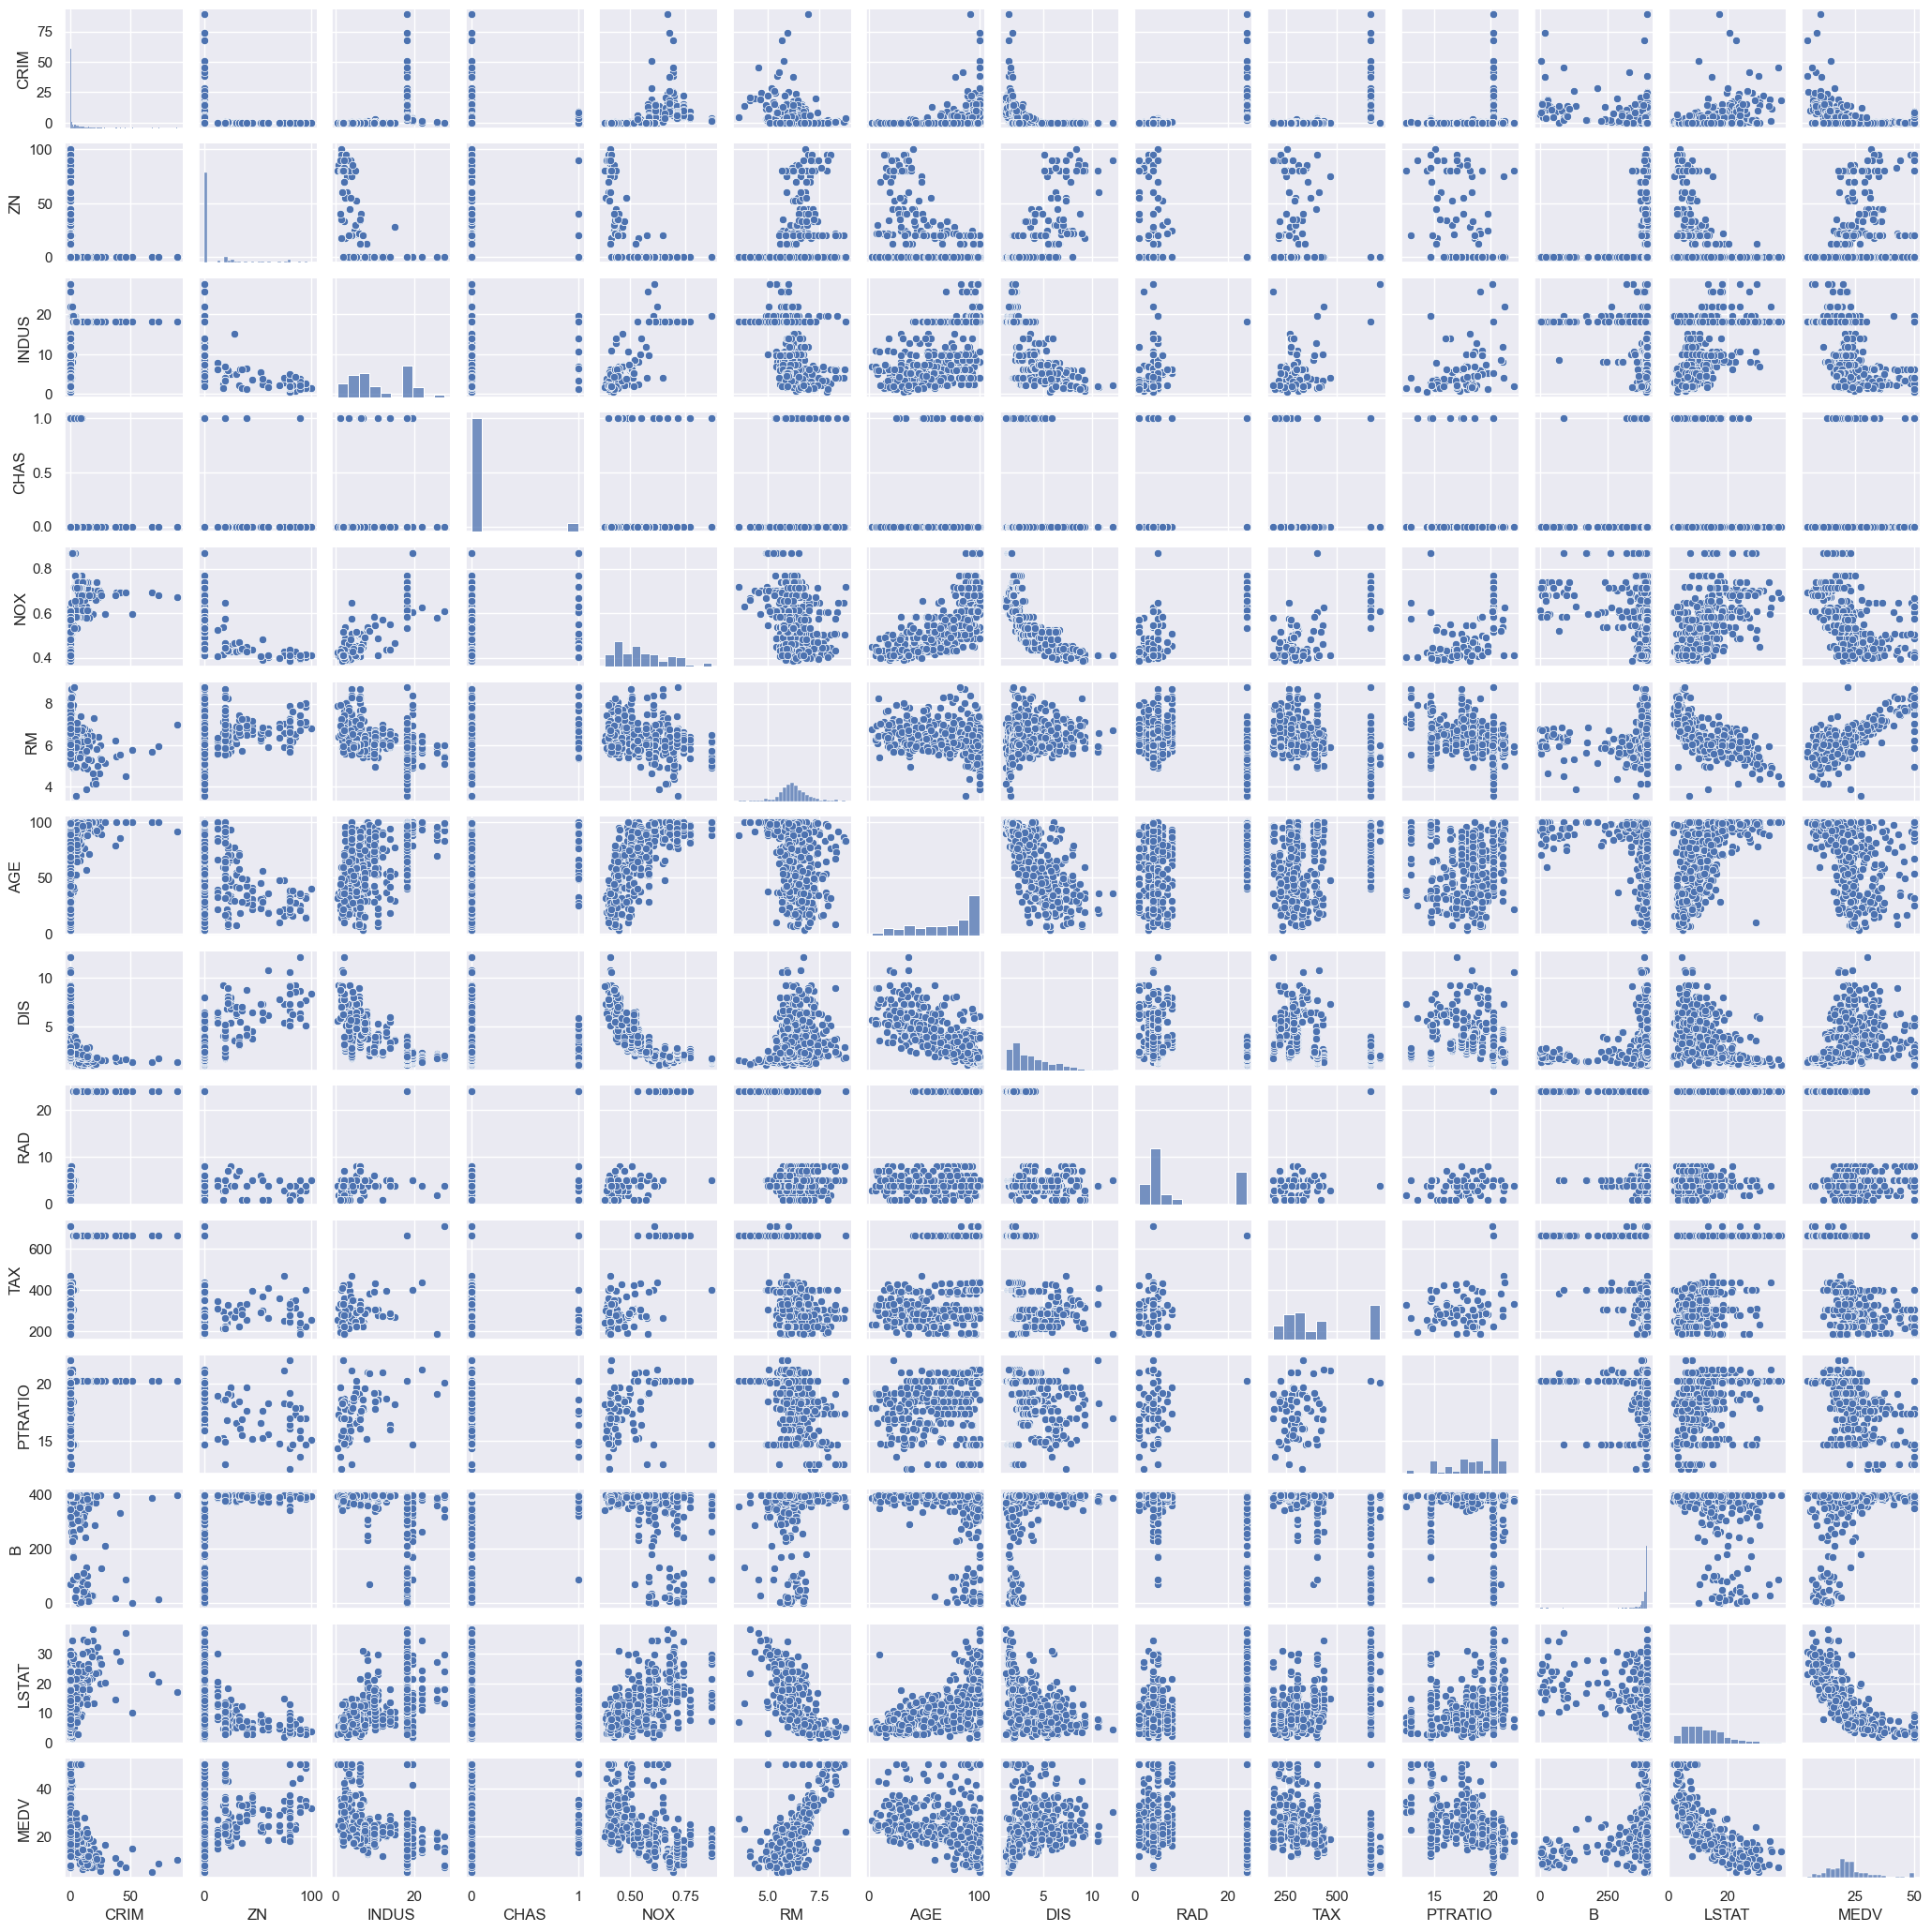

In [175]:
sns.pairplot(df,height=1.5)
plt.show()

In [176]:
col_study=['CRIM','ZN','INDUS','NOX','RM']

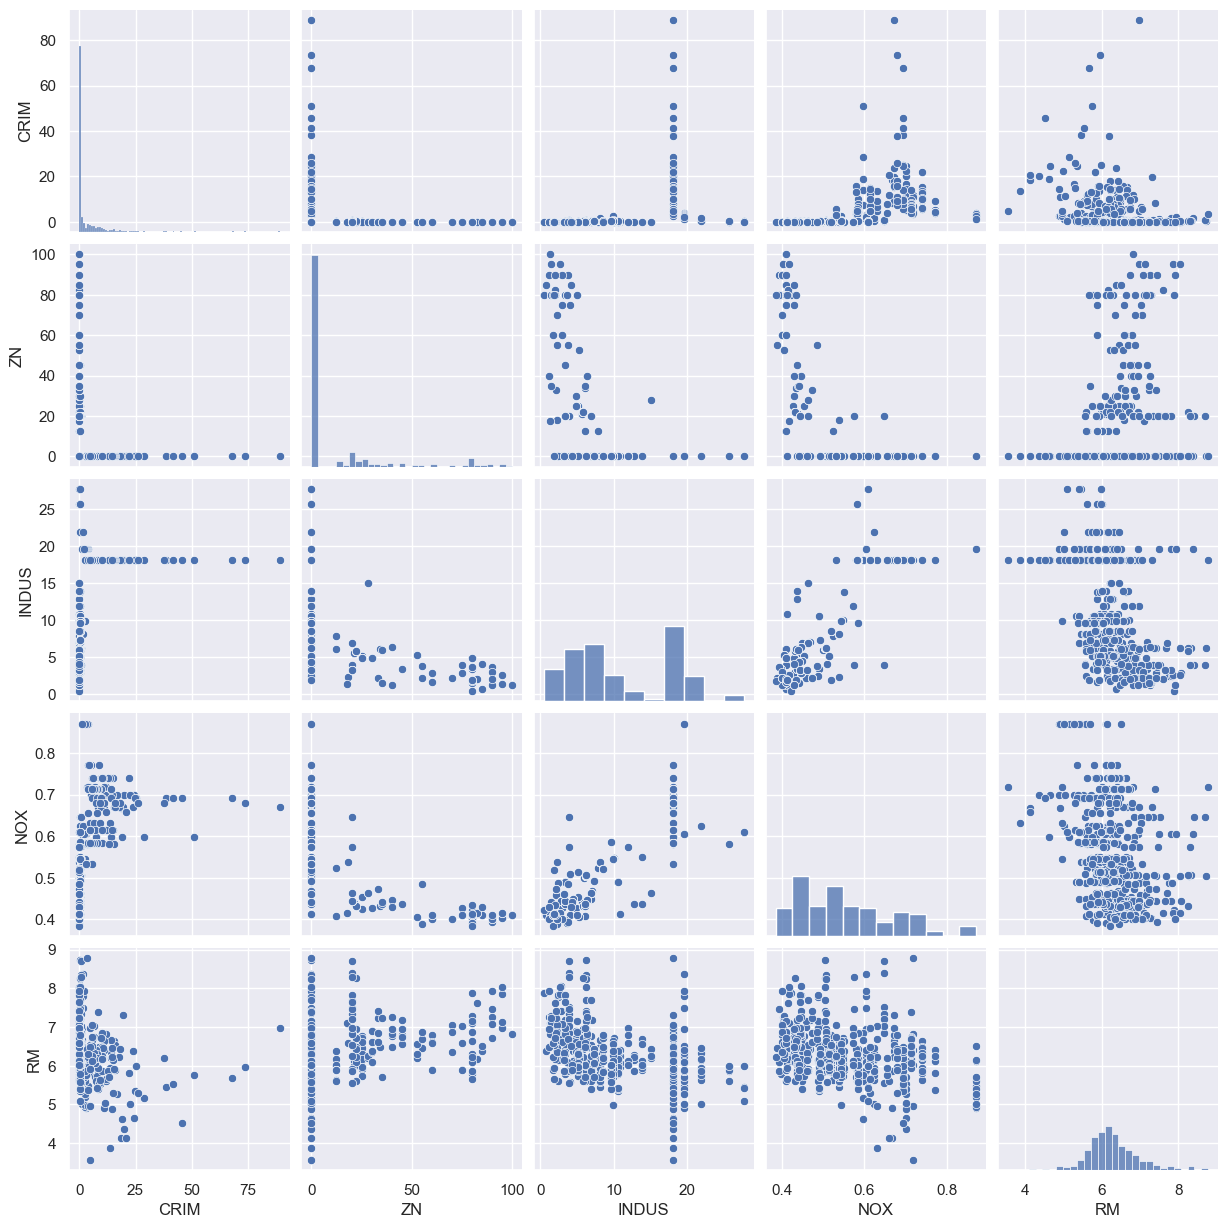

In [177]:
sns.pairplot(df[col_study],height=2.5);
plt.show()

In [178]:
col_study=['PTRATIO','B','LSTAT','MEDV']

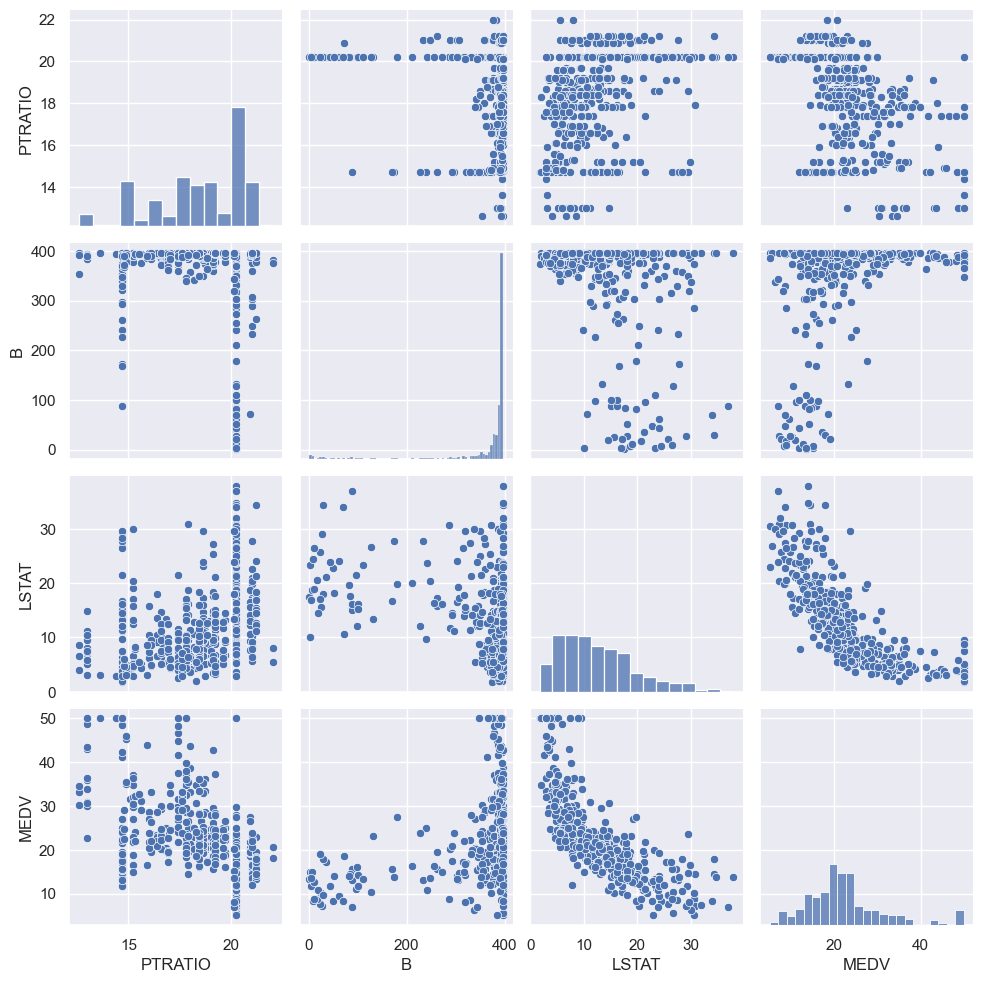

In [179]:
sns.pairplot(df[col_study],height=2.5);
plt.show()

# Correlation Analysis and Feature Selection

In [180]:
pd.options.display.float_format='{:,.3f}'.format

In [181]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000,-0.191,0.402,-0.054,0.417,-0.219,0.354,-0.374,0.625,0.581,0.281,-0.381,0.445,-0.391
ZN,-0.191,1.000,-0.532,-0.037,-0.514,0.321,-0.564,0.657,-0.311,-0.312,-0.414,0.171,-0.414,0.373
INDUS,0.402,-0.532,1.000,0.060,0.765,-0.390,0.638,-0.712,0.605,0.731,0.391,-0.361,0.591,-0.482
CHAS,-0.054,-0.037,0.060,1.000,0.075,0.105,0.079,-0.094,0.001,-0.032,-0.111,0.051,-0.047,0.181
NOX,0.417,-0.514,0.765,0.075,1.000,-0.302,0.732,-0.769,0.611,0.668,0.189,-0.380,0.583,-0.427
RM,-0.219,0.321,-0.390,0.105,-0.302,1.000,-0.247,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
AGE,0.354,-0.564,0.638,0.079,0.732,-0.247,1.000,-0.745,0.458,0.509,0.269,-0.275,0.603,-0.395
DIS,-0.374,0.657,-0.712,-0.094,-0.769,0.205,-0.745,1.000,-0.495,-0.534,-0.232,0.292,-0.493,0.250
RAD,0.625,-0.311,0.605,0.001,0.611,-0.210,0.458,-0.495,1.000,0.910,0.465,-0.444,0.480,-0.382
TAX,0.581,-0.312,0.731,-0.032,0.668,-0.292,0.509,-0.534,0.910,1.000,0.461,-0.442,0.536,-0.469


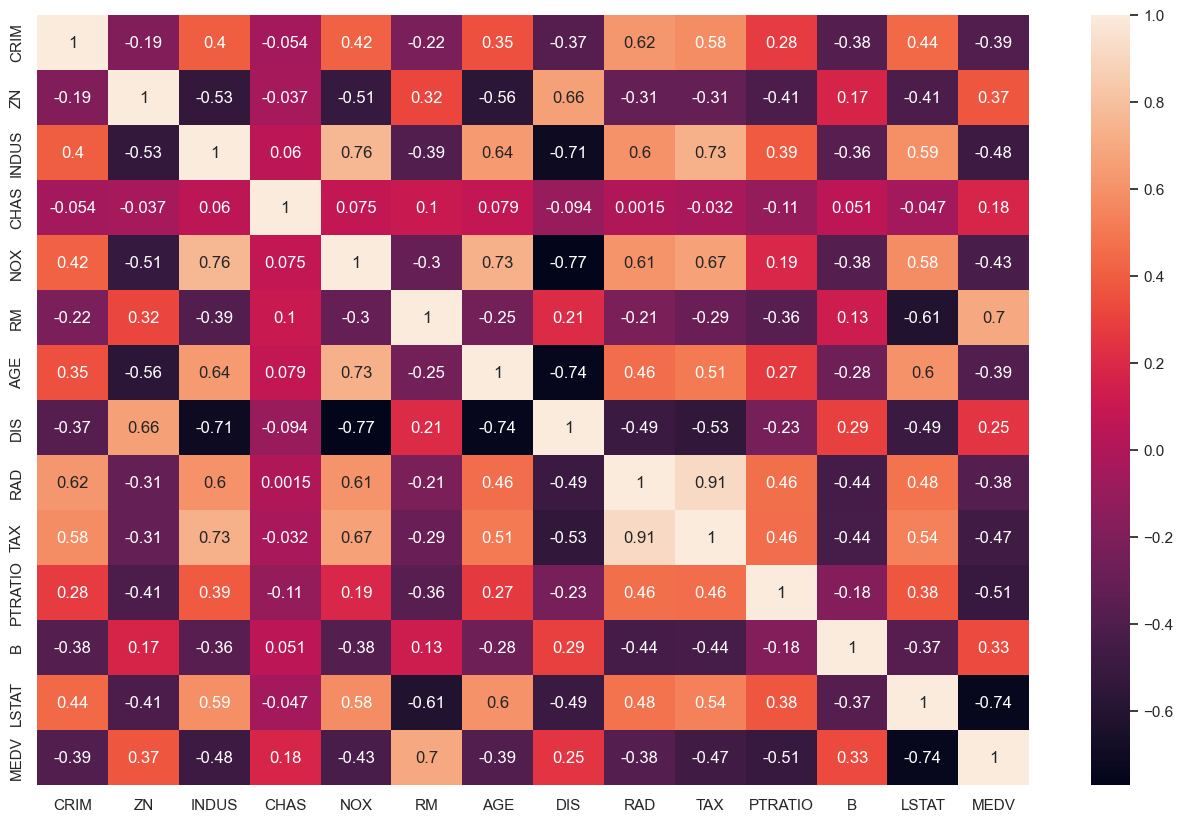

In [182]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [183]:
sns.heatmap?

Signature:
sns.heatmap(
    data,
    *,
    vmin=None,
    vmax=None,
    cmap=None,
    center=None,
    robust=False,
    annot=None,
    fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=False,
    xticklabels='auto',
    yticklabels='auto',
    mask=None,
    ax=None,
    **kwargs,
)
Docstring:
Plot rectangular data as a color-encoded matrix.

This is an Axes-level function and will draw the heatmap into the
currently-active Axes if none is provided to the ``ax`` argument.  Part of
this Axes space will be taken and used to plot a colormap, unless ``cbar``
is False or a separate Axes is provided to ``cbar_ax``.

Parameters
----------
data : rectangular dataset
    2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
    is provided, the index/column information will be used to label the
    columns and rows.
vmin, vmax : floats, optional
    Values to anchor the colormap, otherwise

In [184]:
col_study=['CRIM','PTRATIO','RM','MEDV','B']

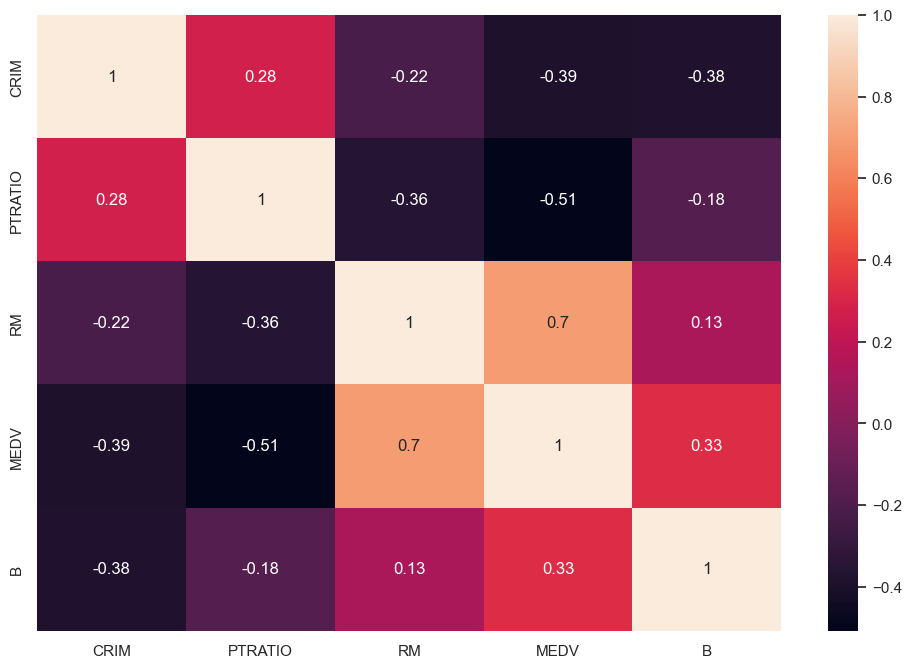

In [185]:
plt.figure(figsize=(12,8))
sns.heatmap(df[col_study].corr(),annot=True)
plt.show()

# Linear regression using Scikit-Learn

In [186]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006,18.000,2.310,0.000,0.538,6.575,65.200,4.090,1,296,15.300,396.900,4.980,24.000
1,0.027,0.000,7.070,0.000,0.469,6.421,78.900,4.967,2,242,17.800,396.900,9.140,21.600
2,0.027,0.000,7.070,0.000,0.469,7.185,61.100,4.967,2,242,17.800,392.830,4.030,34.700
3,0.032,0.000,2.180,0.000,0.458,6.998,45.800,6.062,3,222,18.700,394.630,2.940,33.400
4,0.069,0.000,2.180,0.000,0.458,7.147,54.200,6.062,3,222,18.700,396.900,NaN,36.200


In [187]:
X=df['RM'].values.reshape(-1,1)

In [188]:
X

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [6.377],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [5.933],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

In [189]:
y=df['MEDV'].values
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [190]:
from sklearn.linear_model import LinearRegression

In [191]:
model=LinearRegression()

In [192]:
model.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [193]:
model.coef_

array([9.10210898])

In [194]:
model.intercept_

np.float64(-34.67062077643857)

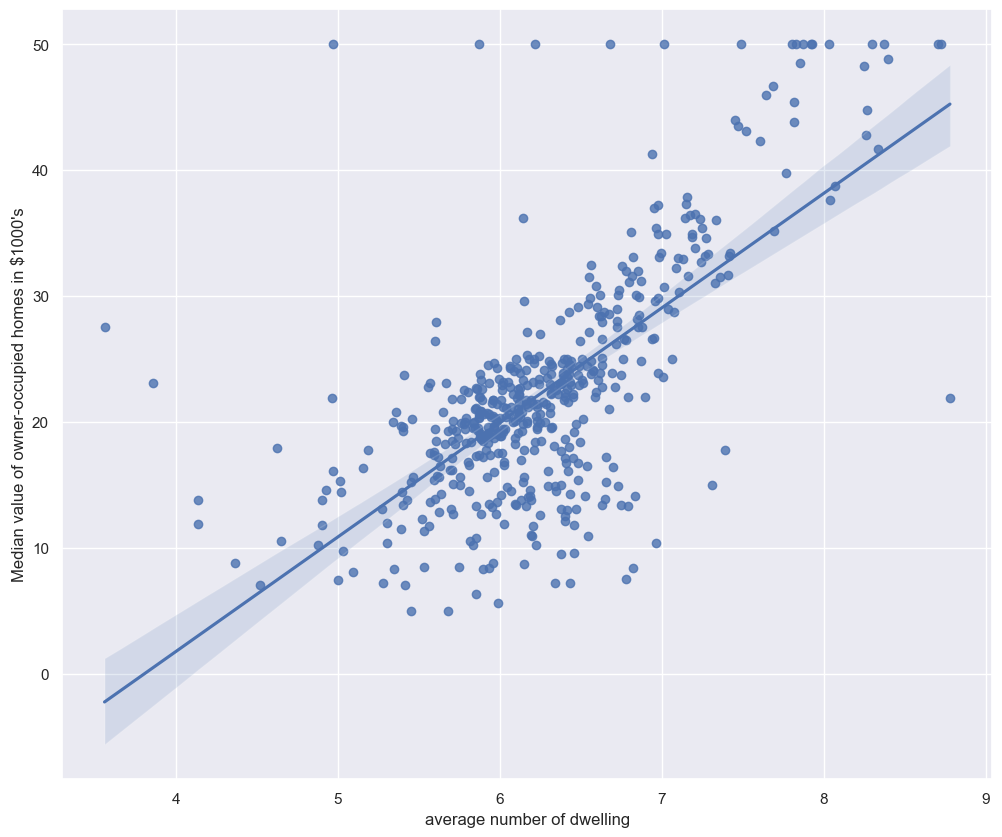

In [195]:
plt.figure(figsize=(12,10));
sns.regplot(x=X,y=y)
plt.xlabel('average number of dwelling')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.show();

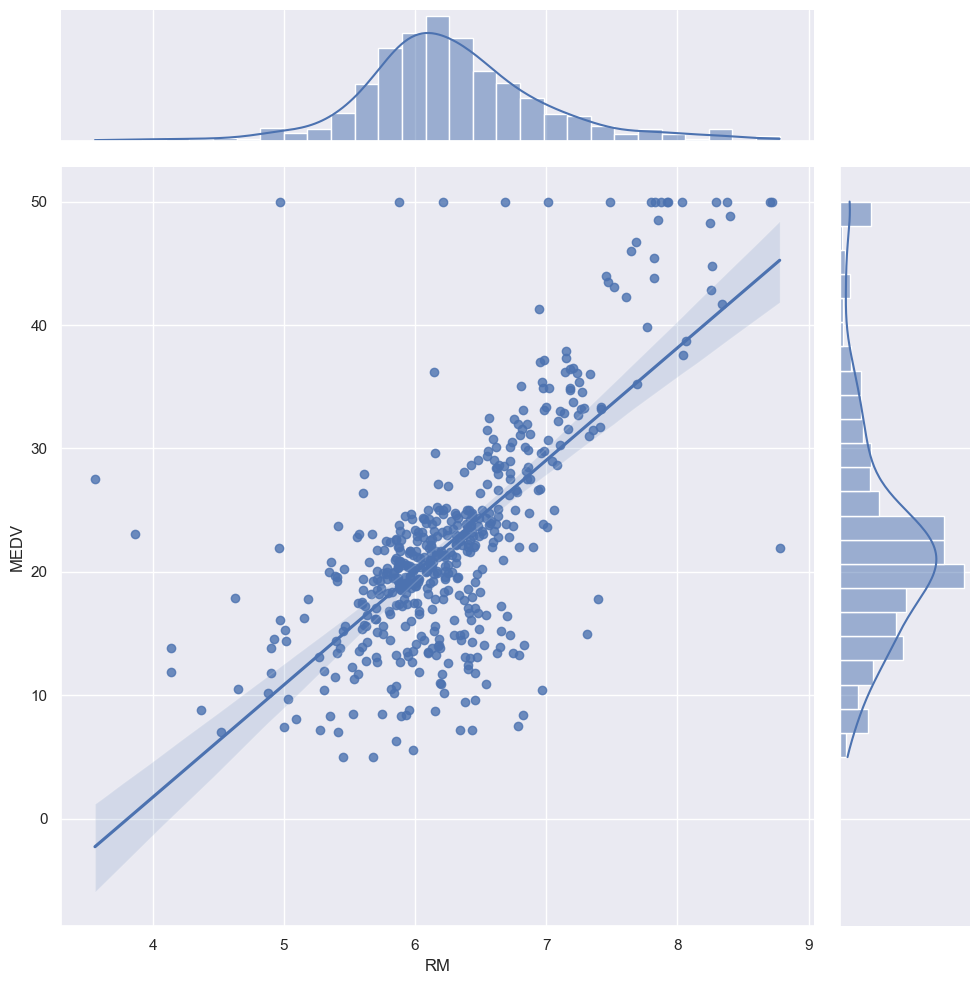

In [196]:
sns.jointplot(x='RM',y='MEDV',data=df,kind='reg',height=10)
plt.show()

In [197]:
model.predict(np.array([5]).reshape(1,-1))

array([10.83992413])

In [198]:
model.predict(np.array([6]).reshape(1,-1))

array([19.94203311])

# Five Steps Machine Learning Process

In [199]:
df.fillna(df.median(), inplace=True)

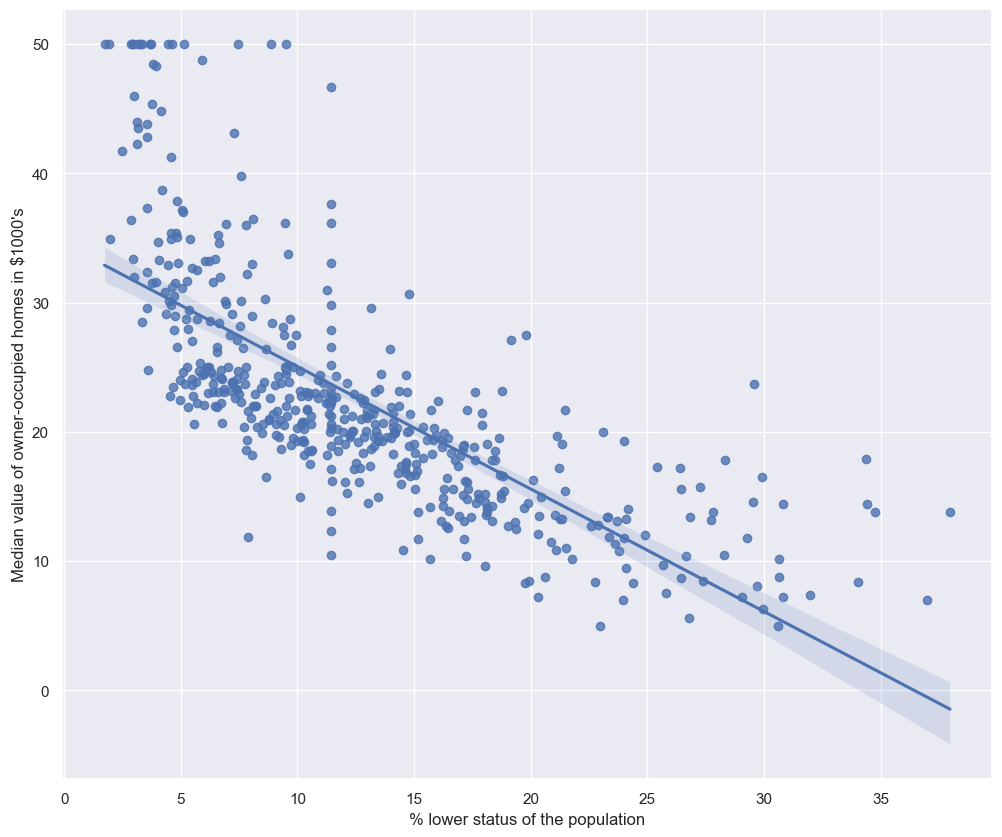

In [200]:
#step-1: Selecting a model
#step-2:
ml_2=LinearRegression()
#step-3:
X=df['LSTAT'].values.reshape(-1,1)
y= df['MEDV'].values
#step-4:
ml_2.fit(X,y)
plt.figure(figsize=(12,10))
sns.regplot(x=X,y=y)
plt.xlabel("% lower status of the population")
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.show()

#step-5:
ml_2.predict(np.array([15]).reshape(1,-1))

# Robust Regression

In [201]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006,18.000,2.310,0.000,0.538,6.575,65.200,4.090,1,296,15.300,396.900,4.980,24.000
1,0.027,0.000,7.070,0.000,0.469,6.421,78.900,4.967,2,242,17.800,396.900,9.140,21.600
2,0.027,0.000,7.070,0.000,0.469,7.185,61.100,4.967,2,242,17.800,392.830,4.030,34.700
3,0.032,0.000,2.180,0.000,0.458,6.998,45.800,6.062,3,222,18.700,394.630,2.940,33.400
4,0.069,0.000,2.180,0.000,0.458,7.147,54.200,6.062,3,222,18.700,396.900,11.430,36.200


 ## RANSAC Algorithm

In [202]:
X=df['RM'].values.reshape(-1,1)
y=df['MEDV'].values

In [203]:
from sklearn.linear_model import RANSACRegressor

In [204]:
ransac= RANSACRegressor()

In [205]:
ransac.fit(X,y)


,estimator,None
,min_samples,None
,residual_threshold,None
,is_data_valid,None
,is_model_valid,None
,max_trials,100
,max_skips,inf
,stop_n_inliers,inf
,stop_score,inf
,stop_probability,0.99
,loss,'absolute_error'


In [206]:
inlier_mask= ransac.inlier_mask_
outlier_mask=np.logical_not(inlier_mask)

In [207]:
np.arange(3,10,1)

array([3, 4, 5, 6, 7, 8, 9])

In [208]:
line_X=np.arange(3,10,1)
line_y_ransac=ransac.predict(line_X.reshape(-1,1))

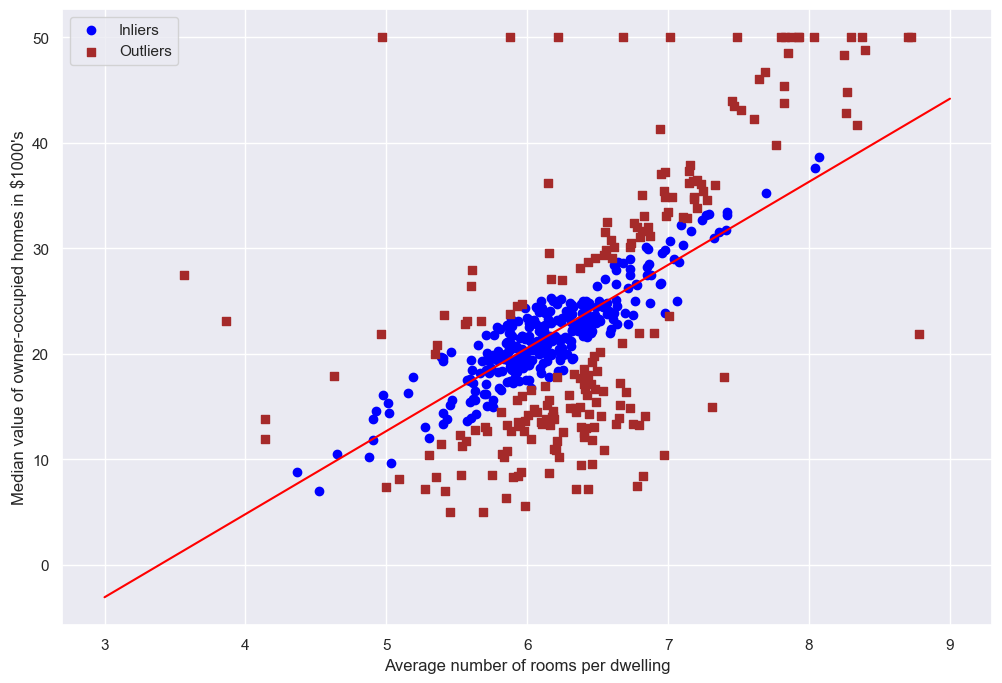

In [209]:
sns.set(style='darkgrid',context='notebook')
plt.figure(figsize=(12,8))
plt.scatter(X[inlier_mask],y[inlier_mask],c='blue',marker='o',label='Inliers')
plt.scatter(X[outlier_mask],y[outlier_mask],c='brown',marker='s',label='Outliers')
plt.plot(line_X,line_y_ransac,color='red')
plt.xlabel("Average number of rooms per dwelling")
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.legend()
plt.show()

In [210]:
ransac.estimator_.coef_

array([7.87356324])

In [211]:
ransac.estimator_.intercept_

np.float64(-26.681146549132038)

In [212]:
X=df['LSTAT'].values.reshape(-1,1)
y=df['MEDV'].values
ransac.fit(X,y)
inlier_mask= ransac.inlier_mask_
outlier_mask=np.logical_not(inlier_mask)
line_X=np.arange(0,40,1)
line_y_ransac=ransac.predict(line_X.reshape(-1,1))

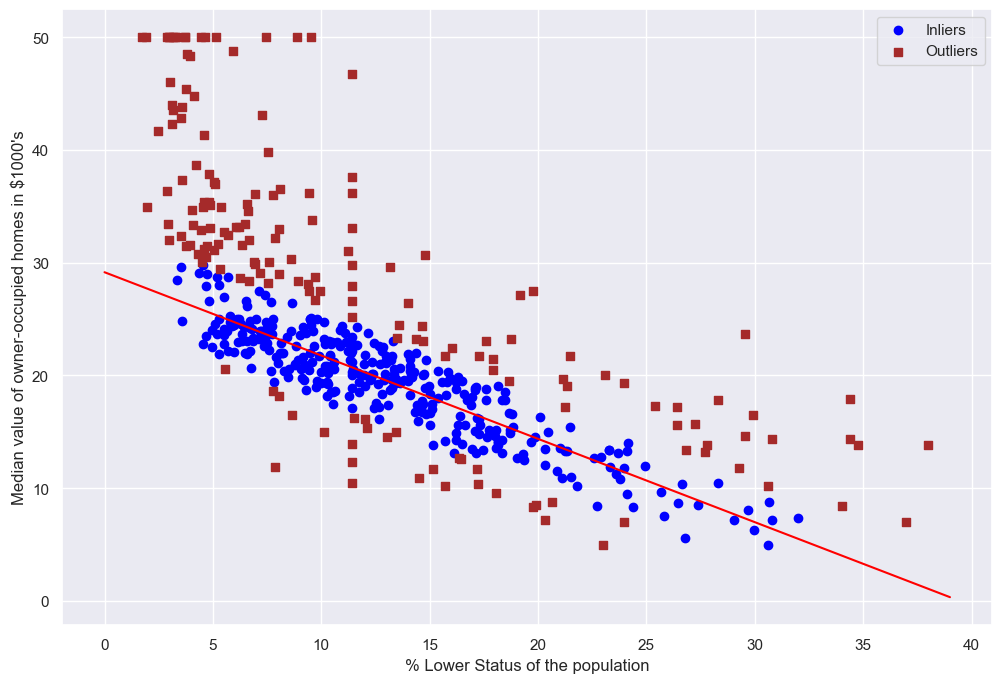

In [213]:
sns.set(style='darkgrid',context='notebook')
plt.figure(figsize=(12,8))
plt.scatter(X[inlier_mask],y[inlier_mask],c='blue',marker='o',label='Inliers')
plt.scatter(X[outlier_mask],y[outlier_mask],c='brown',marker='s',label='Outliers')
plt.plot(line_X,line_y_ransac,color='red')
plt.xlabel("% Lower Status of the population")
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.legend()
plt.show()

##  Performance Evaluation of Regression Model

In [214]:
from sklearn.model_selection import train_test_split

In [215]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006,18.000,2.310,0.000,0.538,6.575,65.200,4.090,1,296,15.300,396.900,4.980,24.000
1,0.027,0.000,7.070,0.000,0.469,6.421,78.900,4.967,2,242,17.800,396.900,9.140,21.600
2,0.027,0.000,7.070,0.000,0.469,7.185,61.100,4.967,2,242,17.800,392.830,4.030,34.700
3,0.032,0.000,2.180,0.000,0.458,6.998,45.800,6.062,3,222,18.700,394.630,2.940,33.400
4,0.069,0.000,2.180,0.000,0.458,7.147,54.200,6.062,3,222,18.700,396.900,11.430,36.200


In [216]:
X=df.iloc[:, :-1].values  #all rows and all columns except  the last one

In [217]:
y= df['MEDV'].values

In [218]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [219]:
lr=LinearRegression()

In [220]:
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [221]:
y_train_pred=lr.predict(X_train)

In [222]:
y_test_pred=lr.predict(X_test)

## 1.Residual Analysis

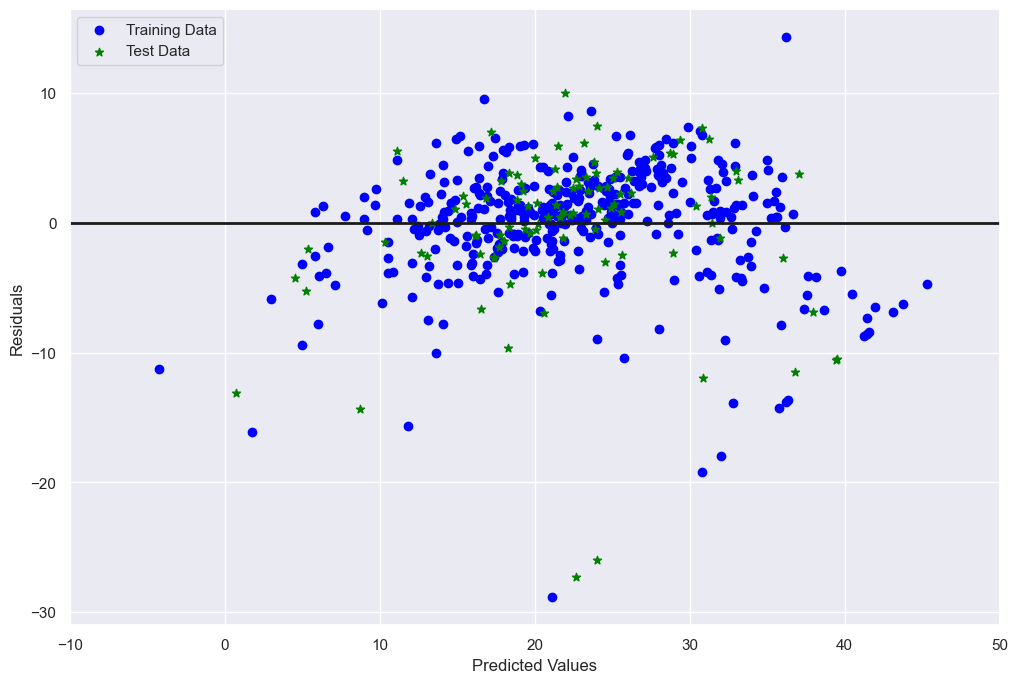

In [223]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred,y_train_pred - y_train,c='blue',marker='o',label='Training Data')
plt.scatter(y_test_pred,y_test_pred - y_test,c='green',marker='*',label='Test Data')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0,xmin=-10,xmax=50,lw=2,color='k')
plt.xlim([-10,50])
plt.show()

## 2.Mean Square Error(MSE):

In [224]:
from sklearn.metrics import mean_squared_error

In [225]:
mean_squared_error(y_train,y_train_pred)

19.967655574787507

In [226]:
mean_squared_error(y_test,y_test_pred)  

34.873346714150465

In [227]:
#training data has less error then testing data as per the above results.Its very common in beginning.

## 3.Coefficient of Determination, R^2

In [228]:
from sklearn.metrics import r2_score

In [229]:
r2_score(y_train,y_train_pred)

0.76548293259478

In [230]:
r2_score(y_test,y_test_pred)

0.5717301336497329

## What does a Near Perfect Model Looks like?

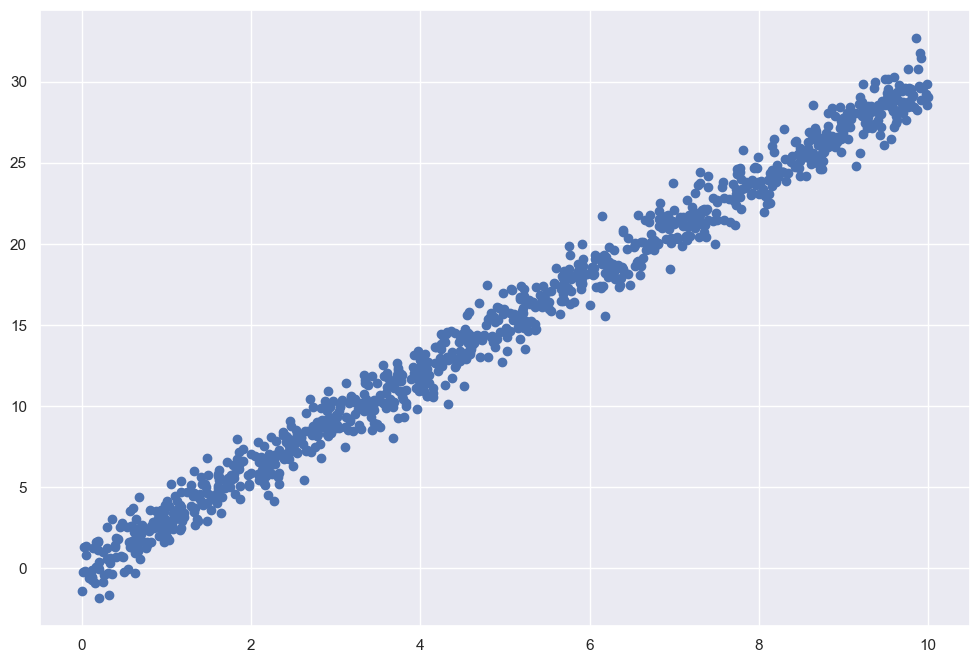

In [231]:
generate_random=np.random.RandomState(0)
x=10*generate_random.rand(1000)
y=3*x+np.random.randn(1000)
plt.figure(figsize=(12,8))
plt.scatter(x,y)
plt.show()

In [232]:
from sklearn.model_selection import train_test_split

In [233]:
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=0)

In [234]:
from sklearn.linear_model import LinearRegression
model=LinearRegression(fit_intercept=True)
model.fit(X_train.reshape(-1,1),y_train)

y_train_pred=model.predict(X_train.reshape(-1,1))
y_test_pred=model.predict(X_test.reshape(-1,1))

## 1.Residual Analysis

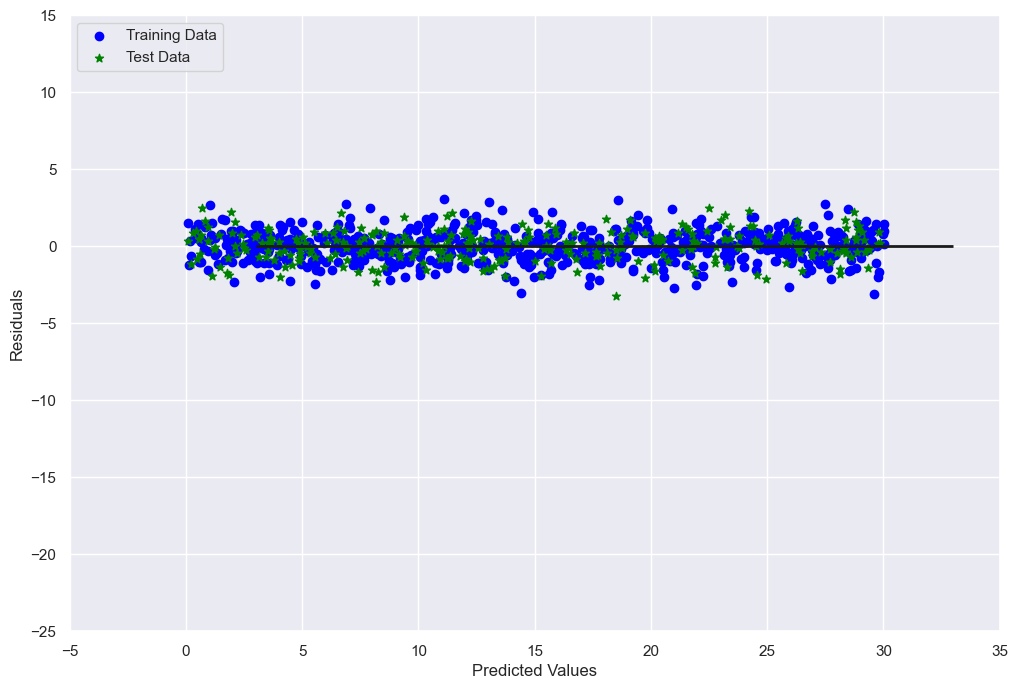

In [235]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred,y_train_pred - y_train,c='blue',marker='o',label='Training Data')
plt.scatter(y_test_pred,y_test_pred - y_test,c='green',marker='*',label='Test Data')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0,xmin=3,xmax=33,lw=2,color='k')
plt.xlim([-5,35])
plt.ylim([-25,15])
plt.show()

## 2. Mean Squared Error(MSE):

In [236]:
mean_squared_error(y_train,y_train_pred)

0.9413440775781909

In [237]:
mean_squared_error(y_test,y_test_pred)

0.9318282153471271

## 3. Coeffiecient of Determination, R^2:

In [238]:
r2_score(y_train,y_train_pred)

0.9876672103810671

In [239]:
r2_score(y_test,y_test_pred)

0.987846664091238

# Multiple Regression

In [265]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

In [266]:
from sklearn.datasets import fetch_openml

boston = fetch_openml(name="boston", version=1, as_frame=True)
data = boston.frame   # we intensionally loaded the boston dataset because the dataset is removed in the 1.2 version of sklearn

In [267]:
df= data.drop('MEDV', axis=1)

In [268]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296.00,15.30,396.90,4.98
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242.00,17.80,396.90,9.14
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242.00,17.80,392.83,4.03
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222.00,18.70,394.63,2.94
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222.00,18.70,396.90,5.33


In [269]:
df.shape

(506, 13)

In [270]:
X=df

In [271]:
y=data['MEDV'].values

In [272]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## Statsmodels

In [273]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

We need to add a constant term to allow statsmodels.api to calculate bias/intercepts

$y=mX$

$y=mX+c$

In [274]:
X_constant=sm.add_constant(X)

In [275]:
pd.DataFrame(X_constant)

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.00,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296.00,15.30,396.90,4.98
1,1.00,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242.00,17.80,396.90,9.14
2,1.00,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242.00,17.80,392.83,4.03
3,1.00,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222.00,18.70,394.63,2.94
4,1.00,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222.00,18.70,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.00,0.06,0.00,11.93,0,0.57,6.59,69.10,2.48,1,273.00,21.00,391.99,9.67
502,1.00,0.05,0.00,11.93,0,0.57,6.12,76.70,2.29,1,273.00,21.00,396.90,9.08
503,1.00,0.06,0.00,11.93,0,0.57,6.98,91.00,2.17,1,273.00,21.00,396.90,5.64
504,1.00,0.11,0.00,11.93,0,0.57,6.79,89.30,2.39,1,273.00,21.00,393.45,6.48


In [276]:
sm.OLS?

Init signature: sm.OLS(endog, exog=None, missing='none', hasconst=None, **kwargs)
Docstring:     
Ordinary Least Squares

Parameters
----------
endog : array_like
    A 1-d endogenous response variable. The dependent variable.
exog : array_like
    A nobs x k array where `nobs` is the number of observations and `k`
    is the number of regressors. An intercept is not included by default
    and should be added by the user. See
    :func:`statsmodels.tools.add_constant`.
missing : str
    Available options are 'none', 'drop', and 'raise'. If 'none', no nan
    checking is done. If 'drop', any observations with nans are dropped.
    If 'raise', an error is raised. Default is 'none'.
hasconst : None or bool
    Indicates whether the RHS includes a user-supplied constant. If True,
    a constant is not checked for and k_constant is set to 1 and all
    result statistics are calculated as if a constant is present. If
    False, a constant is not checked for and k_constant is set to 0.
**kwa

In [277]:
X = data.drop('MEDV', axis=1)
y = data['MEDV']

In [278]:
import pandas as pd

X = X.apply(pd.to_numeric)
y = pd.to_numeric(y)

In [279]:
import statsmodels.api as sm

X_constant = sm.add_constant(X)

In [280]:
model = sm.OLS(y, X_constant)

In [281]:
lr=model.fit()

In [282]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 08 Feb 2026   Prob (F-statistic):          6.72e-135
Time:                        15:16:27   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## statsmodels.formula.api
Study through Google

## Correlation Matrix
Useful diagnsotic tool to identify collinearity between predictors

In [283]:
pd.options.display.float_format='{:,.2f}'.format
corr_matrix=df.corr()
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54


In [284]:
corr_matrix[np.abs(corr_matrix)<  0.6]=0
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.63,0.00,0.00,0.00,0.00
ZN,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.66,0.00,0.00,0.00,0.00,0.00
INDUS,0.00,0.00,1.00,0.00,0.76,0.00,0.64,-0.71,0.00,0.72,0.00,0.00,0.60
CHAS,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
NOX,0.00,0.00,0.76,0.00,1.00,0.00,0.73,-0.77,0.61,0.67,0.00,0.00,0.00
RM,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.61
AGE,0.00,0.00,0.64,0.00,0.73,0.00,1.00,-0.75,0.00,0.00,0.00,0.00,0.60
DIS,0.00,0.66,-0.71,0.00,-0.77,0.00,-0.75,1.00,0.00,0.00,0.00,0.00,0.00
RAD,0.63,0.00,0.00,0.00,0.61,0.00,0.00,0.00,1.00,0.91,0.00,0.00,0.00
TAX,0.00,0.00,0.72,0.00,0.67,0.00,0.00,0.00,0.91,1.00,0.00,0.00,0.00


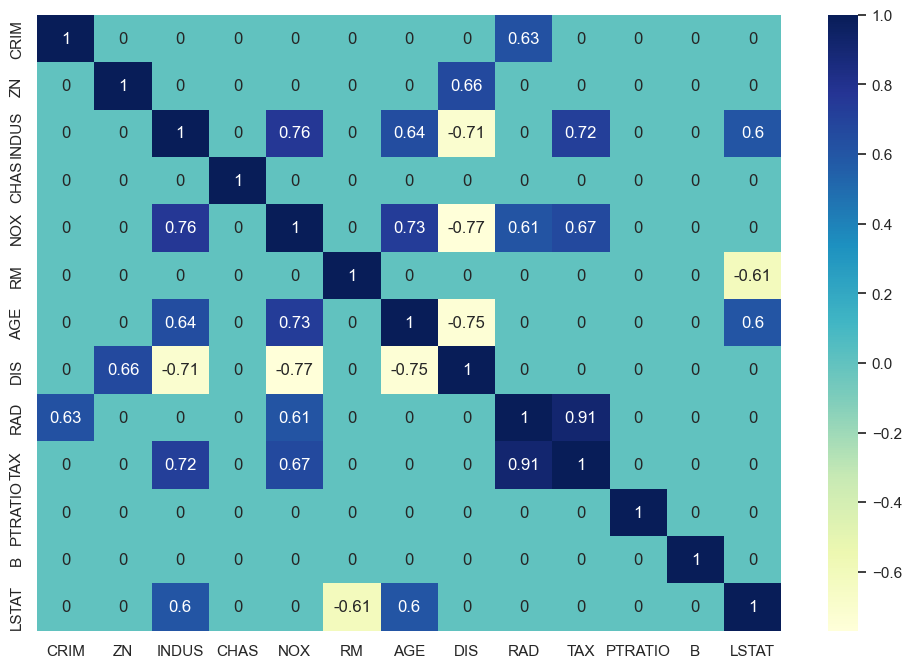

In [285]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu')
plt.show()

## Revisiting Feature importnace and Extractions

In [286]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296.00,15.30,396.90,4.98
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242.00,17.80,396.90,9.14
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242.00,17.80,392.83,4.03
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222.00,18.70,394.63,2.94
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222.00,18.70,396.90,5.33


(array([ 54., 100., 108.,  32.,  74.,   1.,   0.,   0.,   0., 137.]),
 array([187. , 239.4, 291.8, 344.2, 396.6, 449. , 501.4, 553.8, 606.2,
        658.6, 711. ]),
 <BarContainer object of 10 artists>)

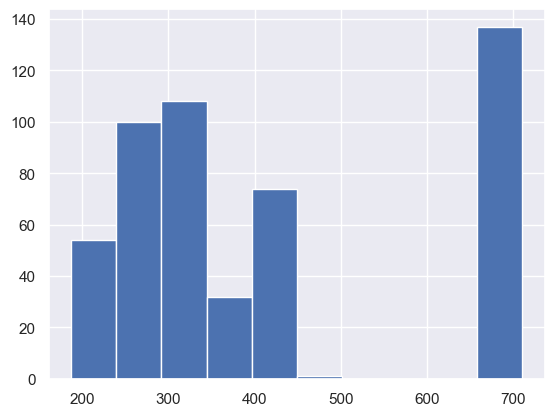

In [287]:
plt.hist(df['TAX'])

(array([75., 80., 89., 60., 78., 30., 57., 21.,  0., 16.]),
 array([0.385 , 0.4336, 0.4822, 0.5308, 0.5794, 0.628 , 0.6766, 0.7252,
        0.7738, 0.8224, 0.871 ]),
 <BarContainer object of 10 artists>)

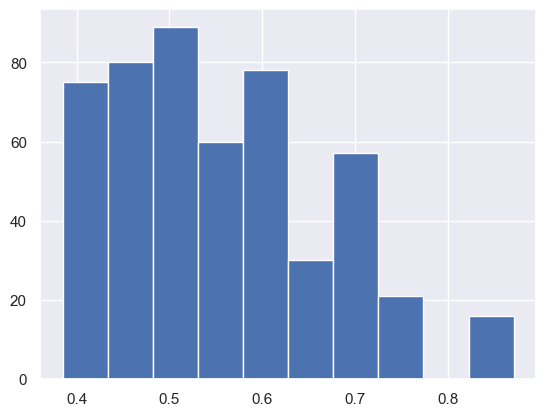

In [288]:
plt.hist(df['NOX'])